In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Percorsi delle directory contenenti le facce estratte dai video FAKE e REAL
FAKE_FACES_PATH = "/Volumes/Macintosh SSD/Developer/TEST 1000 faces/FAKE_faces_1000"
REAL_FACES_PATH = "/Volumes/Macintosh SSD/Developer/TEST 1000 faces/REAL_faces_1000"

# Etichette per i video REAL e FAKE
LABELS = {"REAL": 0, "FAKE": 1}

# Inizializza le liste per le facce, le etichette e le origini
faces = []
labels = []
origins = []

# Funzione per caricare le immagini da una directory e assegnare le etichette
def load_faces_from_directory(directory, label, origin_label):
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".jpeg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                faces.append(img)
                labels.append(label)
                origins.append(origin_label)
                count += 1
    print(f"Caricate {count} immagini dalla directory {directory}")

# Carica le facce dai video FAKE
print("Inizio caricamento facce dai video FAKE")
load_faces_from_directory(FAKE_FACES_PATH, LABELS["FAKE"], "FAKE")

# Carica le facce dai video REAL
print("Inizio caricamento facce dai video REAL")
load_faces_from_directory(REAL_FACES_PATH, LABELS["REAL"], "REAL")

# Converti le liste in array numpy
print("Converti delle liste in array numpy")
faces = np.array(faces)
labels = np.array(labels)
origins = np.array(origins)
print("Conversione effettuata delle liste in array numpy")

# Normalize RGB values
print("Inizio normalizzazione di faces")
faces = faces / 255.0
print("Normalizzazione effettuata correttamente per faces")

# Stampa il numero totale di facce caricate
print(f"Totale facce caricate: {len(faces)}")
print(f"Totale etichette caricate: {len(labels)}")
print(f"Totale origini caricate: {len(origins)}")

# Split del dataset in training, validation e test set
print("Inizio split del dataset")
X_train, X_temp, y_train, y_temp, origins_train, origins_temp = train_test_split(faces, labels, origins, test_size=0.28, random_state=42)
X_val, X_test, y_val, y_test, origins_val, origins_test = train_test_split(X_temp, y_temp, origins_temp, test_size=0.5, random_state=42)
print("Split del dataset completato")

# Stampa delle dimensioni dei dataset dopo lo split
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Inizio caricamento facce dai video FAKE
Caricate 1000 immagini dalla directory /Volumes/Macintosh SSD/Developer/TEST 1000 faces/FAKE_faces_1000
Inizio caricamento facce dai video REAL
Caricate 1000 immagini dalla directory /Volumes/Macintosh SSD/Developer/TEST 1000 faces/REAL_faces_1000
Converti delle liste in array numpy
Conversione effettuata delle liste in array numpy
Inizio normalizzazione di faces
Normalizzazione effettuata correttamente per faces
Totale facce caricate: 2000
Totale etichette caricate: 2000
Totale origini caricate: 2000
Inizio split del dataset
Split del dataset completato
Training set: 1440 samples
Validation set: 280 samples
Test set: 280 samples


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Carica il modello pre-addestrato VGG16 senza il top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela i pesi del modello pre-addestrato
for layer in base_model.layers:
    layer.trainable = False

# Aggiungi i tuoi livelli di classificazione
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Crea il modello
model = Model(inputs=base_model.input, outputs=x)

# Compila il modello
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Addestra il modello
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

# Valuta il modello
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

58889256/58889256 [==============================] - 3s 0us/step


Epoch 1/20
45/45 [==============================] - 366s 8s/step - loss: 0.7379 - accuracy: 0.5861 - val_loss: 0.5985 - val_accuracy: 0.6786
Epoch 2/20
45/45 [==============================] - 350s 8s/step - loss: 0.5685 - accuracy: 0.6833 - val_loss: 0.5686 - val_accuracy: 0.7214
Epoch 3/20
45/45 [==============================] - 362s 8s/step - loss: 0.4790 - accuracy: 0.7708 - val_loss: 0.5818 - val_accuracy: 0.6964
Epoch 4/20
45/45 [==============================] - 257s 6s/step - loss: 0.4472 - accuracy: 0.7840 - val_loss: 0.5426 - val_accuracy: 0.7500
Epoch 5/20
45/45 [==============================] - 174s 4s/step - loss: 0.3818 - accuracy: 0.8569 - val_loss: 0.5485 - val_accuracy: 0.7464
Epoch 6/20
45/45 [==============================] - 171s 4s/step - loss: 0.3547 - accuracy: 0.8694 - val_loss: 0.5361 - val_accuracy: 0.7607
Epoch 7/20
45/45 [==============================] - 173s 4s/step - loss: 0.3264 - accuracy: 0.8889 - val_loss: 0.5585 - val_accuracy: 0.7321
Epoch 8/20
45

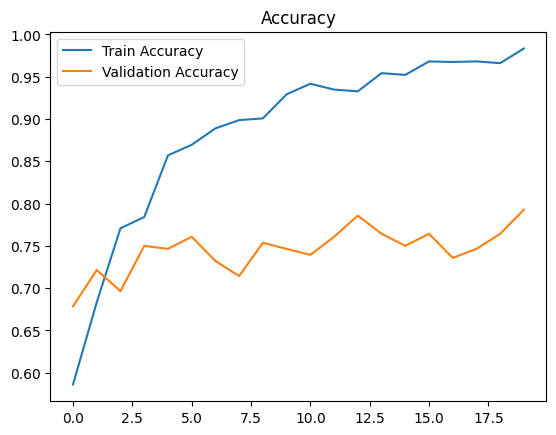

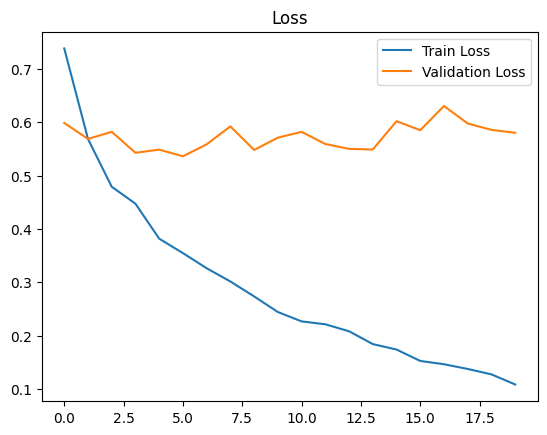

In [4]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy') # history.history['accuracy']: Contiene i valori di accuratezza calcolati dal modello su ogni epoca per il training set
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # history.history['val_accuracy']: valori calcolati sul validation set dopo ogni epoca, ci dice quanto bene il modello generalizza su dati non visti durante il training
plt.legend() # Stampa la leggenda in basso a dx
plt.title('Accuracy') # Da il titolo al grafico in alto
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss') # history.history['loss']: i valori della funzione di perdita calcolati dal modello sul training set durante ogni epoca
plt.plot(history.history['val_loss'], label='Validation Loss') # history.history['val_loss']: i valori calcolati sul validation set dopo ogni epoca, ci dice quanto bene il modello generalizza su dati non visti
plt.legend()
plt.title('Loss')
plt.show()


## Test del modello
### Spiegazione del codice di seguito:

1. Calcola il numero totale di frame analizzati.
2. Calcola il numero di frame FAKE e REAL correttamente identificati.
3. Calcola la percentuale di frame correttamente identificati.
4. Stampa una leggenda che spiega cosa significano le etichette 1 e 0.
5. Stampa il numero totale di frame analizzati, il numero di frame FAKE e REAL correttamente identificati, e la percentuale di frame correttamente identificati.
6. Stampa la lista dei frame correttamente identificati con la percentuale predetta e l'etichetta reale.
7. Stampa il numero di frame non correttamente riconosciuti e la lista dei frame non correttamente riconosciuti con la percentuale predetta e l'etichetta reale.


In [17]:
# Test del modello
predictions = model.predict(X_test)  # Probabilità per ogni frame
predicted_labels = (predictions > 0.79).astype(int)  # Soglia: 0.79

# Trova i frame predetti come FAKE e REAL
fake_indices = np.where(predicted_labels == 1)[0]  # Indici dei frame FAKE
real_indices = np.where(predicted_labels == 0)[0]  # Indici dei frame REAL

# Numero totale di frame analizzati
total_frames = len(X_test)

# Numero di frame FAKE identificati
num_fake_frames = len(fake_indices)

# Percentuale di frame FAKE identificati
percent_fake_frames = (num_fake_frames / num_real_fake_frames) * 100

# Numero di frame REAL identificati
num_real_frames = len(real_indices)

# Percentuale di frame REAL identificati
percent_real_frames = (num_real_frames / num_real_real_frames) * 100

# Frame realmente REAL e FAKE
num_real_real_frames = np.sum(y_test == 0)
num_real_fake_frames = np.sum(y_test == 1)

# Frame correttamente predetti
correct_fake_indices = np.where((predicted_labels == 1) & (y_test == 1))[0]
num_correct_fake_frames = len(correct_fake_indices)

correct_real_indices = np.where((predicted_labels == 0) & (y_test == 0))[0]
num_correct_real_frames = len(correct_real_indices)

# Frame FAKE identificati come REAL
fake_as_real_indices = np.where((predicted_labels == 0) & (y_test == 1))[0]
num_fake_as_real = len(fake_as_real_indices)

print("Leggenda: Etichetta 1 = FAKE, Etichetta 0 = REAL")
print(f"Numero totale di frame analizzati: {total_frames}")
print(f"Numero di frame realmente REAL: {num_real_real_frames}")
print(f"Numero di frame realmente FAKE: {num_real_fake_frames}")
print(f"Numero di frame FAKE identificati: {num_fake_frames} ({percent_fake_frames:.2f}%)")
print(f"Numero di frame REAL identificati: {num_real_frames} ({percent_real_frames:.2f}%)")
print(f"Numero di frame FAKE correttamente identificati: {num_correct_fake_frames}")
print(f"Numero di frame REAL correttamente identificati: {num_correct_real_frames}")
print(f"Numero di frame FAKE identificati come REAL: {num_fake_as_real}")

print("Percentuale di predizione per ogni frame (con etichetta associata):")
for i in range(total_frames):
    predizione_errata = "PREDIZIONE ERRATA" if predicted_labels[i] != y_test[i] else ""
    print(f"Frame {i + 1}: {predictions[i][0]:.2f} (Etichetta reale: {y_test[i]}) {predizione_errata}")

print("Lista dei frame FAKE riconosciuti con la percentuale predetta:")
for i in fake_indices:
    predizione_errata = "PREDIZIONE ERRATA" if predicted_labels[i] != y_test[i] else ""
    print(f"Frame {i + 1}: {predictions[i][0]:.2f} (Etichetta reale: {y_test[i]}) {predizione_errata}")

print("Lista dei frame REAL riconosciuti con la percentuale predetta:")
for i in real_indices:
    predizione_errata = "PREDIZIONE ERRATA" if predicted_labels[i] != y_test[i] else ""
    print(f"Frame {i + 1}: {predictions[i][0]:.2f} (Etichetta reale: {y_test[i]}) {predizione_errata}")

9/9 [==============================] - 37s 4s/step
Leggenda: Etichetta 1 = FAKE, Etichetta 0 = REAL
Numero totale di frame analizzati: 280
Numero di frame realmente REAL: 140
Numero di frame realmente FAKE: 140
Numero di frame FAKE identificati: 102 (72.86%)
Numero di frame REAL identificati: 178 (127.14%)
Numero di frame FAKE correttamente identificati: 14280
Numero di frame REAL correttamente identificati: 24920
Numero di frame FAKE identificati come REAL: 24920
Percentuale di predizione per ogni frame (con etichetta associata):
Frame 1: 0.15 (Etichetta reale: 0) 
Frame 2: 0.99 (Etichetta reale: 1) 
Frame 3: 0.77 (Etichetta reale: 0) 
Frame 4: 0.84 (Etichetta reale: 0) PREDIZIONE ERRATA
Frame 5: 0.51 (Etichetta reale: 0) 
Frame 6: 0.05 (Etichetta reale: 0) 
Frame 7: 0.75 (Etichetta reale: 1) PREDIZIONE ERRATA
Frame 8: 0.72 (Etichetta reale: 1) PREDIZIONE ERRATA
Frame 9: 0.90 (Etichetta reale: 1) 
Frame 10: 0.16 (Etichetta reale: 0) 
Frame 11: 0.98 (Etichetta reale: 1) 
Frame 12: 0.02